# Filtering for entries with Humboldt County

Humboldt County has the most obligations in the dataset, prompting us to wonder what types of obligations are going to this county.

In [3]:
import pandas as pd
from siuba import *
import numpy as np
from sqlalchemy import create_engine
from siuba.sql import LazyTbl
from plotnine import *

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.


In [5]:
import _clean_data
import _dla_utils

In [6]:
#df = _clean_data.make_clean_data()
df= pd.read_parquet("dla_df.parquet")

In [7]:
df.head()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,...,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,5904,2018.0,Humboldt County
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,...,nan,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,32D0,2018.0,Mendocino County
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,...,nan,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,2018.0,Humboldt County
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,...,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,5924,2018.0,Sacramento County
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,...,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,5924,2018.0,Sacramento County


In [10]:
df.primary_agency_name.value_counts().sort_values(ascending=False)

Humboldt County                           627
Los Angeles                               490
Fresno                                    459
Los Angeles County                        456
Santa Cruz County                         446
                                         ... 
Colma                                       1
Antelope Valley Transit Authority           1
Poway                                       1
Tustin                                      1
Chula Vista Elementary School District      1
Name: primary_agency_name, Length: 619, dtype: int64

In [11]:
df >> filter(_.primary_agency_name.str.contains("Humboldt County"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,...,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,5904,2018.0,Humboldt County
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,...,nan,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,2018.0,Humboldt County
61,Obligated,BPMP,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,...,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,5904,2018.0,Humboldt County
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,...,nan,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,32L0,2018.0,Humboldt County
180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,...,nan,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,32L0,2018.0,Humboldt County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20187,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,...,nan,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,32L0,2021.0,Humboldt County
20188,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaT,NaT,NaT,0.00,...,nan,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,32L0,2021.0,Humboldt County
20189,HQ,ER,32L0(326),Humboldt County,2021-09-29,2021-09-29,NaT,NaT,NaT,0.00,...,nan,Humboldt County On Murray Rd Pm 5.57,Permanent Restoration,7,2021-08-23,2021-08-23,NON-MPO,32L0,2021.0,Humboldt County
20192,HQ,ER,4400(046),Humboldt County,2021-09-09,2021-10-13,NaT,NaT,NaT,131198.09,...,nan,Alderpoint Road Pm 40.21 To 40.70,Emergency Relief Pr Only,4,2021-08-31,2021-09-09,NON-MPO,4400,2021.0,Humboldt County


In [12]:
df_hc = df >> filter(_.primary_agency_name.str.contains("Humboldt County"))

In [13]:
print(len(df_hc))

627


In [14]:
df_hc >> count(_.locode) >> arrange(-_.n)

,locode,n
0,5904,627


### What Prefix Codes are fequently used?

In [21]:
(_dla_utils.find_top(df_hc))>>filter(_.variable=="prefix")

,value,count,variable
0,ER,379,prefix
1,ACSTER,64,prefix
2,BPMP,50,prefix
3,ACSTP,31,prefix
4,BRLO,22,prefix
5,BRLS,20,prefix
6,HSIPL,19,prefix
7,RPSTPL,18,prefix
8,BRLOZB,9,prefix
9,ATPL,5,prefix


In [22]:
# ER funds, or emergency relief funds, are the most obligated type of funding to the county.

In [23]:
df_hc >> filter(_.prefix=='ER')>> summarize(avgfunds= _.total_requested.sum())

,avgfunds
0,9841663.19


#### What Project IDs occur the most?

In [37]:
df_hc >> group_by(_.prefix) >> count(_.projectID) >> arrange(-_.n)


,prefix,projectID,n
13,ER,32L0,171
11,ER,20A0,117
0,ACST-ER,32L0,62
15,ER,4400,51
6,BPMPL,5904,50
16,ER,4820,31
7,BRLO,5904,22
9,BRLS,5904,20
19,HSIP,5904,19
20,RPSTP,5904,18


In [24]:
_dla_utils.get_nunique(df_hc, 'projectID', 'prefix')

,prefix,n
9,ER,6
0,ACSTER,2
1,ACSTP,2
2,ATPL,1
3,ATPLNI,1
4,BPMP,1
5,BRLO,1
6,BRLOZB,1
7,BRLS,1
8,BRLSZD,1


In [38]:
df_hc >> group_by(_.prefix) >> count(_.project_no) >> arrange(-_.n)


,prefix,project_no,n
89,BRLO,5904(126),7
98,BRLS,5904(127),7
88,BRLO,5904(113),6
277,HSIP,5904(160),6
280,RPSTP,5904(106),6
...,...,...,...
255,ER,4400(071),1
259,ER,4820(007),1
264,ER,4820(017),1
272,FBDLNI,5904(130),1


In [26]:
_dla_utils.get_nunique(df_hc, 'project_no', 'prefix')

,prefix,n
9,ER,170
0,ACSTER,47
1,ACSTP,22
4,BPMP,16
5,BRLO,6
7,BRLS,6
13,RPSTPL,6
12,HSIPL,5
6,BRLOZB,2
11,HRRRL,2


In [27]:
# interesting that when we group by the 7-digit project numberm, the top is no longer ER. 

In [28]:
df_hc >> filter(_.prefix=='BRLO', _.project_no=='5904(126)') 


,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
2512,Obligated,BRLO,5904(126),Humboldt County,2017-11-08,2018-02-06,2018-02-09,2018-02-09,2018-02-15,346000.00,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),6,2017-11-06,2017-11-06,NON-MPO,5904,2017.0,Humboldt County
4407,Obligated,BRLO,5904(126),Humboldt County,2017-04-27,2017-05-10,2017-05-11,2017-05-15,2017-05-16,505000.00,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),5,NaT,NaT,NON-MPO,5904,2017.0,Humboldt County
4866,Obligated,BRLO,5904(126),Humboldt County,2016-10-31,2017-03-03,2017-03-06,2017-03-06,2017-03-07,130000.00,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),4,NaT,NaT,NON-MPO,5904,2016.0,Humboldt County
9958,Obligated,BRLO,5904(126),Humboldt County,2015-02-02,2015-02-03,2015-02-04,2015-02-04,2015-02-04,109000.00,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive,Bridge Rehabilitation (tc),3,NaT,NaT,NON-MPO,5904,2015.0,Humboldt County
11835,Obligated,BRLO,5904(126),Humboldt County,2014-05-23,2014-05-23,2014-05-29,2014-05-29,2014-05-30,-109000.00,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive,Bridge Rehabilitation (tc),2,NaT,NaT,NON-MPO,5904,2014.0,Humboldt County
13127,Obligated,BRLO,5904(126),Humboldt County,2019-03-20,2019-04-02,2019-04-11,2019-04-12,2019-04-15,108577.00,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),7,2019-03-19,2019-03-27,NON-MPO,5904,2019.0,Humboldt County
15631,Obligated,BRLO,5904(126),Humboldt County,2020-01-22,2020-01-22,2020-01-30,2020-01-30,2020-01-31,-21691.16,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),8,2020-01-16,2020-01-17,NON-MPO,5904,2020.0,Humboldt County


##### Using funds from two sources for the same location

In [29]:
#trying something here 
(df_hc
     >> filter(_.project_location.str.contains("Jacoby Creek"))
     >> count(_.project_no)
)

,project_no,n
0,5904(126),7
1,5904(165),2


In [30]:
df_hc >> filter(_.project_location.str.contains("Jacoby Creek"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
941,Obligated,BRLO,5904(165),Humboldt County,2018-07-03,2018-07-06,2018-07-10,2018-07-10,2018-07-19,22655.00,...,HBPLOCAL,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,1,2018-05-02,2018-05-02,NON-MPO,5904,2018.0,Humboldt County
2512,Obligated,BRLO,5904(126),Humboldt County,2017-11-08,2018-02-06,2018-02-09,2018-02-09,2018-02-15,346000.00,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),6,2017-11-06,2017-11-06,NON-MPO,5904,2017.0,Humboldt County
4407,Obligated,BRLO,5904(126),Humboldt County,2017-04-27,2017-05-10,2017-05-11,2017-05-15,2017-05-16,505000.00,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),5,NaT,NaT,NON-MPO,5904,2017.0,Humboldt County
4866,Obligated,BRLO,5904(126),Humboldt County,2016-10-31,2017-03-03,2017-03-06,2017-03-06,2017-03-07,130000.00,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),4,NaT,NaT,NON-MPO,5904,2016.0,Humboldt County
9958,Obligated,BRLO,5904(126),Humboldt County,2015-02-02,2015-02-03,2015-02-04,2015-02-04,2015-02-04,109000.00,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive,Bridge Rehabilitation (tc),3,NaT,NaT,NON-MPO,5904,2015.0,Humboldt County
11835,Obligated,BRLO,5904(126),Humboldt County,2014-05-23,2014-05-23,2014-05-29,2014-05-29,2014-05-30,-109000.00,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive,Bridge Rehabilitation (tc),2,NaT,NaT,NON-MPO,5904,2014.0,Humboldt County
13127,Obligated,BRLO,5904(126),Humboldt County,2019-03-20,2019-04-02,2019-04-11,2019-04-12,2019-04-15,108577.00,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),7,2019-03-19,2019-03-27,NON-MPO,5904,2019.0,Humboldt County
15631,Obligated,BRLO,5904(126),Humboldt County,2020-01-22,2020-01-22,2020-01-30,2020-01-30,2020-01-31,-21691.16,...,HBPLOCAL,Jacoby Creek Bridge On Brookwood Drive ( Br 04...,Bridge Rehabilitation (tc),8,2020-01-16,2020-01-17,NON-MPO,5904,2020.0,Humboldt County
20024,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,...,nan,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,5904,2021.0,Humboldt County


In [32]:
(df_hc >> filter(_.project_location.str.contains("Jacoby Creek")) 
     >> group_by(_.project_no)
     >> count(_.prepared_y)
     >> arrange(_.prepared_y)
)

,project_no,prepared_y,n
0,5904(126),2014.0,1
1,5904(126),2015.0,1
2,5904(126),2016.0,1
3,5904(126),2017.0,2
6,5904(165),2018.0,1
4,5904(126),2019.0,1
5,5904(126),2020.0,1
7,5904(165),2021.0,1


In [25]:
## we have two project numbers for the same bridge, with different funds around the same time

In [33]:
df_hc >> filter(_.prefix=='BRLS', _.project_no=='5904(127)') 


,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
2983,Obligated,BRLS,5904(127),Humboldt County,2017-07-13,2017-11-13,2017-11-20,2017-11-21,2017-11-30,2180287.0,...,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,5,2017-02-24,2017-08-16,NON-MPO,5904,2017.0,Humboldt County
6674,Obligated,BRLS,5904(127),Humboldt County,2016-05-17,2016-05-25,2016-05-26,2016-05-26,2016-06-02,138992.0,...,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,4,NaT,NaT,NON-MPO,5904,2016.0,Humboldt County
8726,Obligated,BRLS,5904(127),Humboldt County,2015-07-13,2015-07-13,2015-07-14,2015-07-14,2015-07-15,17706.0,...,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,3,NaT,NaT,NON-MPO,5904,2015.0,Humboldt County
9950,Obligated,BRLS,5904(127),Humboldt County,2015-02-02,2015-02-04,2015-02-05,2015-02-05,2015-02-05,203619.0,...,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,2,NaT,NaT,NON-MPO,5904,2015.0,Humboldt County
13123,Obligated,BRLS,5904(127),Humboldt County,2019-03-12,2019-04-02,2019-04-12,2019-04-15,2019-04-16,192163.0,...,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,6,2019-03-06,2019-03-11,NON-MPO,5904,2019.0,Humboldt County
18500,Obligated,BRLS,5904(127),Humboldt County,2021-02-10,2021-02-10,2021-02-18,2021-02-25,2021-03-02,0.0,...,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,7,2021-02-09,2021-02-10,NON-MPO,5904,2021.0,Humboldt County
19251,Obligated,BRLS,5904(127),Humboldt County,2021-04-29,2021-05-19,2021-05-28,2021-06-01,2021-06-15,-48480.2,...,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,8,2020-08-28,2021-05-18,NON-MPO,5904,2021.0,Humboldt County


In [34]:
#trying this again with Williams Creek
(df_hc
     >> filter(_.project_location.str.contains("Williams Creek"))
     >> group_by(_.prefix, _.project_no, _.prepared_y)
     >> count(_.project_no)
)

,prefix,project_no,prepared_y,n
0,BRLOZB,5904(032),2015.0,1
1,BRLOZB,5904(032),2016.0,1
2,BRLOZB,5904(032),2017.0,2
3,BRLS,5904(127),2015.0,2
4,BRLS,5904(127),2016.0,1
5,BRLS,5904(127),2017.0,1
6,BRLS,5904(127),2019.0,1
7,BRLS,5904(127),2021.0,2
8,BRLS,5904(164),2018.0,1
9,BRLS,5904(164),2021.0,1


In [35]:
df_hc >> filter(_.project_location.str.contains("Williams Creek"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
557,Obligated,BRLS,5904(164),Humboldt County,2018-07-26,2018-07-26,2018-09-11,2018-09-12,2018-09-16,47480.00,...,230-0000-0031,Williams Creek Bridge At Grizzly Bluff Road,Revegetation Mitigation Monitoring,1,2018-05-29,2018-07-26,NON-MPO,5904,2018.0,Humboldt County
2983,Obligated,BRLS,5904(127),Humboldt County,2017-07-13,2017-11-13,2017-11-20,2017-11-21,2017-11-30,2180287.00,...,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,5,2017-02-24,2017-08-16,NON-MPO,5904,2017.0,Humboldt County
3963,Obligated,BRLOZB,5904(032),Humboldt County,2017-07-06,2017-07-06,2017-07-06,2017-07-06,2017-07-17,-55.96,...,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),11,NaT,NaT,NON-MPO,5904,2017.0,Humboldt County
4326,Obligated,BRLOZB,5904(032),Humboldt County,2017-05-16,2017-05-16,2017-05-16,2017-05-16,2017-05-24,0.00,...,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),10,NaT,NaT,NON-MPO,5904,2017.0,Humboldt County
6674,Obligated,BRLS,5904(127),Humboldt County,2016-05-17,2016-05-25,2016-05-26,2016-05-26,2016-06-02,138992.00,...,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,4,NaT,NaT,NON-MPO,5904,2016.0,Humboldt County
7518,Obligated,BRLOZB,5904(032),Humboldt County,2016-01-27,2016-01-27,2016-01-27,2016-01-27,2016-01-29,-180.24,...,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),9,NaT,NaT,NON-MPO,5904,2016.0,Humboldt County
8726,Obligated,BRLS,5904(127),Humboldt County,2015-07-13,2015-07-13,2015-07-14,2015-07-14,2015-07-15,17706.00,...,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,3,NaT,NaT,NON-MPO,5904,2015.0,Humboldt County
9102,Obligated,BRLOZB,5904(032),Humboldt County,2015-05-04,2015-05-21,2015-06-08,2015-06-08,2015-06-09,115438.30,...,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),8,NaT,NaT,NON-MPO,5904,2015.0,Humboldt County
9950,Obligated,BRLS,5904(127),Humboldt County,2015-02-02,2015-02-04,2015-02-05,2015-02-05,2015-02-05,203619.00,...,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,2,NaT,NaT,NON-MPO,5904,2015.0,Humboldt County
13123,Obligated,BRLS,5904(127),Humboldt County,2019-03-12,2019-04-02,2019-04-12,2019-04-15,2019-04-16,192163.00,...,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,6,2019-03-06,2019-03-11,NON-MPO,5904,2019.0,Humboldt County


In [36]:
#interesting. we have a bridge reconstruction going on with funds coming from two programs in the same timeframe 

### Looking into the Sequences

In [37]:
df_hc >> group_by(_.projectID, _.prefix) >> count(_.seq) >> arrange(-_.n)

,projectID,prefix,seq,n
14,32L0,ER,1,58
0,20A0,ER,2,49
16,32L0,ER,3,41
1,20A0,ER,3,38
7,32L0,ACSTER,2,36
...,...,...,...,...
89,5904,RPSTPL,1,1
93,5904,RPSTPL,5,1
96,5904,RPSTPL,8,1
97,5904,RPSTPL,9,1


In [38]:
# making sure this query looks at the number of seq for each 7-digit project code

df_hc >> filter(_.prefix == "ER", _.project_no == "32L0(329)")


,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
251,Obligated,ER,32L0(329),Humboldt County,2018-10-19,2018-10-19,2018-11-02,2018-11-06,2018-11-11,26293.41,...,nan,Alderpoint Road Pm 21.80 - 23.05,Permanent Restoration,1,2018-10-16,2018-10-16,NON-MPO,32L0,2018.0,Humboldt County
16969,Obligated,ER,32L0(329),Humboldt County,2020-07-07,2020-07-21,2020-07-28,2020-08-03,2020-08-06,301505.73,...,nan,Alderpoint Road Pm 21.80 - 23.05,Permanent Restoration,2,2020-07-07,2020-07-21,NON-MPO,32L0,2020.0,Humboldt County
17851,Obligated,ER,32L0(329),Humboldt County,2020-10-19,2020-10-19,2020-10-19,2020-12-24,2021-01-06,3355955.40,...,nan,Alderpoint Road Pm 21.80 - 23.05,Permanent Restoration,4,2020-10-19,2020-10-19,NON-MPO,32L0,2020.0,Humboldt County


In [39]:
# There was a double entry here before removing duplicates. 

In [40]:
df_hc >> count(_.mpo)

,mpo,n
0,NON-MPO,627


In [41]:
df_hc >> filter(_.seq >= 9) >> arrange(_.project_no)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
5280,Obligated,BRLSZD,5904(006),Humboldt County,2016-12-08,2016-12-08,2016-12-08,2016-12-08,2016-12-14,-228.08,...,NON-MPO,"Bald Hills Rd At Klamath River, Martin's Ferry...",Bridge Retrofit / Rehabilitation,13,NaT,NaT,NON-MPO,5904,2016.0,Humboldt County
9844,Obligated,BRLSZD,5904(006),Humboldt County,2014-05-30,2015-02-04,2015-02-05,2015-02-20,2015-02-20,-27390.06,...,NON-MPO,"Bald Hills Rd At Klamath River, Martin's Ferry...",Bridge Retrofit / Rehabilitation,12,NaT,NaT,NON-MPO,5904,2014.0,Humboldt County
3963,Obligated,BRLOZB,5904(032),Humboldt County,2017-07-06,2017-07-06,2017-07-06,2017-07-06,2017-07-17,-55.96,...,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),11,NaT,NaT,NON-MPO,5904,2017.0,Humboldt County
4326,Obligated,BRLOZB,5904(032),Humboldt County,2017-05-16,2017-05-16,2017-05-16,2017-05-16,2017-05-24,0.00,...,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),10,NaT,NaT,NON-MPO,5904,2017.0,Humboldt County
7518,Obligated,BRLOZB,5904(032),Humboldt County,2016-01-27,2016-01-27,2016-01-27,2016-01-27,2016-01-29,-180.24,...,HBPLOCAL,Salt River And Williams Creek Bridges,Seismic-replace 04c0104 & 04c0 (tc),9,NaT,NaT,NON-MPO,5904,2016.0,Humboldt County
5412,Obligated,RPSTPL,5904(106),Humboldt County,2016-11-17,2016-11-17,2016-11-17,2016-11-17,2016-11-18,0.00,...,nan,School Rd From Fischer Rd To Salmon Ave In Mck...,Construct Sidewalks And Bike Lanes (tc),9,NaT,NaT,NON-MPO,5904,2016.0,Humboldt County


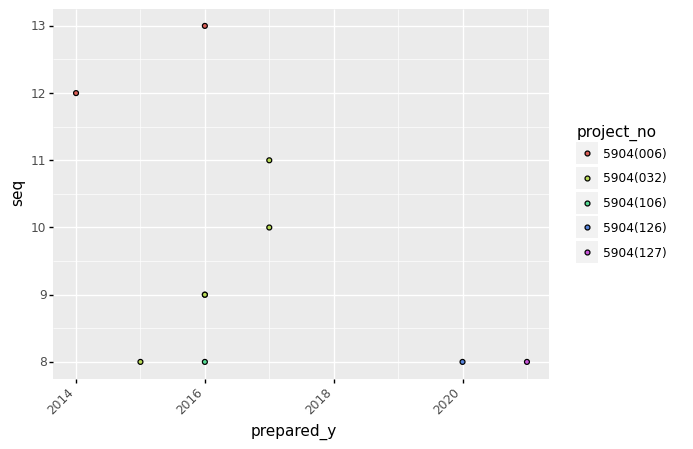

<ggplot: (8775707126694)>

In [43]:
#curious to see where/when the sequences fall on a timeline for different projects
(
    df_hc 
    >> filter(_.seq >= 8) 
    >> group_by(_.project_no)
    >> ggplot(aes("prepared_y", "seq", fill="project_no")) + geom_point() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    
)

### ER Funds

#### Using ER funds for Mattole Road 

In [45]:
#just saw "Mattole Road" on the first entry. Searching using this string. 
df_hc >> filter(_.project_location.str.contains("Mattole R"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,...,nan,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,2018.0,Humboldt County
61,Obligated,BPMP,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,...,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,5904,2018.0,Humboldt County
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,...,nan,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,32L0,2018.0,Humboldt County
180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,...,nan,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,32L0,2018.0,Humboldt County
182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,55422.20,...,nan,Mattole Road Pm 11.05 -11.29,Eo -er,1,2018-11-15,2018-11-15,NON-MPO,32L0,2018.0,Humboldt County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19247,Obligated,ACSTER,32L0(111),Humboldt County,2021-05-13,2021-05-13,2021-05-26,2021-06-08,2021-06-15,0.00,...,nan,Mattole Road (f3c010) Pm 43.62,"Grind Existing Roadway, Recompact/augment Road...",5,2021-04-15,2021-04-15,NON-MPO,32L0,2021.0,Humboldt County
19833,Obligated,ER,32L0(250),Humboldt County,2021-07-23,2021-08-16,2021-08-24,2021-09-23,2021-09-27,-13744.37,...,nan,Mattole Road Pm 11.05-11.29,Permanent Restoration,4,2021-07-19,2021-08-16,NON-MPO,32L0,2021.0,Humboldt County
20186,HQ,ER,32L0(319),Humboldt County,2021-08-04,2021-10-01,NaT,NaT,NaT,-5261.13,...,nan,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,4,2021-06-29,2021-08-16,NON-MPO,32L0,2021.0,Humboldt County
20187,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,...,nan,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,32L0,2021.0,Humboldt County


In [46]:
(df_hc >> filter(_.project_location.str.contains("Mattole R"))
     >> count(_.prefix))

,prefix,n
0,ACSTER,24
1,ACSTP,7
2,BPMP,3
3,BRLS,2
4,ER,122


In [47]:
(df_hc >> filter(_.project_location.str.contains("Mattole R"))
     >> group_by(_.prefix, _.prepared_y)
     >> count(_.project_no)
     >> arrange(-_.n)
)

,prefix,prepared_y,project_no,n
115,ER,2020.0,4400(017),3
39,ER,2015.0,20A0(041),2
42,ER,2015.0,20A0(050),2
43,ER,2015.0,4400(061),2
44,ER,2015.0,4820(003),2
...,...,...,...,...
119,ER,2021.0,32L0(253),1
120,ER,2021.0,32L0(319),1
121,ER,2021.0,32L0(320),1
122,ER,2021.0,32L0(321),1


In [48]:
(df_hc >> filter(_.project_location.str.contains("Mattole R"))
     >> group_by(_.prepared_y, _.prefix)
     >> count(_.type_of_work)
     >> arrange(-_.n)
)

,prepared_y,prefix,type_of_work,n
21,2018.0,ER,Storm Damage Restoration,26
38,2019.0,ER,Permanent Restoration,18
19,2018.0,ER,Permanent Restoration,15
28,2019.0,ACSTER,Permanent Restoration,9
3,2015.0,ER,Emergency Opening,6
...,...,...,...,...
58,2021.0,ACSTER,"Grind Existing Roadway, Recompact/augment Road...",1
60,2021.0,ACSTER,Stabilize Roadway With Earth Retaining Structu...,1
61,2021.0,ACSTP,Permanent Restoration,1
62,2021.0,BRLS,Bridge Replacement (br # 04c0055),1


#### ER project numbers

In [49]:
df_hc >> filter(_.prefix=="ER") >> count(_.projectID) >> arrange(-_.n)

,projectID,n
2,32L0,171
0,20A0,117
4,4400,51
5,4820,31
3,40A0,6
1,28L4,3


In [50]:
df_hc >> filter(_.prefix == "ER") >> count(_.project_no) >> arrange(-_.n)

,project_no,n
63,32L0(121),4
70,32L0(132),4
89,32L0(234),4
90,32L0(235),4
99,32L0(270),4
...,...,...
134,4400(020),1
152,4400(062),1
153,4400(071),1
157,4820(007),1


### What projects are grouped by date

In [51]:
df_hc.sample(3)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
1193,Obligated,ER,20A0(004),Humboldt County,2018-06-25,2018-06-25,2018-06-25,2018-06-25,2018-06-28,0.00,...,nan,"Alderpoint Road, Pm 6.00",Storm Damage Restoration,5,NaT,NaT,NON-MPO,20A0,2018.0,Humboldt County
15628,Obligated,ER,4400(029),Humboldt County,2019-11-08,2019-11-12,2019-12-19,2020-01-24,2020-01-28,9974.52,...,nan,Alderpoint Road Pm 22.45/22.45,Storm Damage,5,2019-11-08,2019-11-08,NON-MPO,4400,2019.0,Humboldt County
16311,Obligated,ER,40A0(020),Humboldt County,2020-03-06,2020-03-06,2020-04-01,2020-04-09,2020-04-13,31688.62,...,nan,Alderpoint Road Pm 0.22 Eo,Emergency Opening,1,2020-03-02,2020-03-02,NON-MPO,40A0,2020.0,Humboldt County


In [52]:
(df_hc
    >> count(_.prepared_date) 
    >> arrange(-_.n)
    >> filter(_.n >= 5)
)

,prepared_date,n
119,2018-03-22,17
120,2018-03-29,16
10,2014-05-22,13
209,2019-09-04,10
141,2018-07-30,9
231,2019-11-04,9
117,2018-03-19,8
211,2019-09-06,8
112,2018-01-19,7
128,2018-06-18,7


#### March 22, 2018: 17 ER Entries

In [53]:
(df_hc
    >> filter(_.prepared_date=='2018-03-22') 
    >> count(_.prefix)
    >> arrange(-_.n)
)

,prefix,n
0,ER,17


In [54]:
(df_hc
    >> filter(_.prepared_date=='2018-03-22') 
)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
1767,Obligated,ER,4400(050),Humboldt County,2018-03-22,2018-03-22,2018-04-27,2018-04-27,2018-05-01,-899.76,...,SH_EMER,Alderpoint Road Pm 42.00 To 42.46,Emergency Relief,7,NaT,NaT,NON-MPO,4400,2018.0,Humboldt County
1840,Obligated,ER,20A0(053),Humboldt County,2018-03-22,2018-03-23,2018-04-09,2018-04-09,2018-04-20,-14591.10,...,nan,"Mattole Road (bull Creek), Pm 3.55",Storm Damage Restoration,2,2018-03-21,2018-03-21,NON-MPO,20A0,2018.0,Humboldt County
1913,Obligated,ER,20A0(042),Humboldt County,2018-03-22,2018-03-23,2018-04-06,2018-04-06,2018-04-16,5183.44,...,nan,"Mattole Road, Pm 26.96",Storm Damage Restoration,2,2018-03-21,2018-03-21,NON-MPO,20A0,2018.0,Humboldt County
1914,Obligated,ER,20A0(048),Humboldt County,2018-03-22,2018-03-23,2018-04-09,2018-04-09,2018-04-16,-17213.28,...,nan,"Mattole Road, Pm 36.98",Permanent Restoration,3,2018-03-21,2018-03-21,NON-MPO,20A0,2018.0,Humboldt County
1915,Obligated,ER,20A0(051),Humboldt County,2018-03-22,2018-03-23,2018-04-09,2018-04-09,2018-04-16,-17493.33,...,nan,"Mattole Road, Pm 42.70",Permanent Restoration,3,2018-03-21,2018-03-21,NON-MPO,20A0,2018.0,Humboldt County
1917,Obligated,ER,20A0(017),Humboldt County,2018-03-22,2018-03-23,2018-04-09,2018-04-09,2018-04-16,-91981.36,...,nan,"Alderpoint Road, Pm 36.98",Permanent Restoration,4,2018-03-21,2018-03-21,NON-MPO,20A0,2018.0,Humboldt County
1961,Obligated,ER,20A0(055),Humboldt County,2018-03-22,2018-03-23,2018-04-03,2018-04-03,2018-04-13,7261.19,...,nan,"Zenia Bluffs Road, Pm 1.20",Storm Damage Restoration,2,2018-03-09,2018-03-09,NON-MPO,20A0,2018.0,Humboldt County
2011,Obligated,ER,20A0(028),Humboldt County,2018-03-22,2018-03-23,2018-04-02,2018-04-02,2018-04-10,2645.20,...,nan,"Kneeland Road, Pm 0.26",Storm Damage Restoration,2,2018-03-09,2018-03-09,NON-MPO,20A0,2018.0,Humboldt County
2013,Obligated,ER,20A0(031),Humboldt County,2018-03-22,2018-03-23,2018-04-02,2018-04-02,2018-04-10,7602.62,...,nan,"Kneeland Road, Pm 6.45",Storm Damage Restoration,2,2018-03-09,2018-03-09,NON-MPO,20A0,2018.0,Humboldt County
2015,Obligated,ER,20A0(037),Humboldt County,2018-03-22,2018-03-23,2018-04-03,2018-04-03,2018-04-10,11398.21,...,nan,"Mattole Road, Pm 5.25",Storm Damage Restoration,2,2018-03-09,2018-03-09,NON-MPO,20A0,2018.0,Humboldt County


* Most of these are for Mattole Road, similar types of works, same phase, different sectiopns of the road

In [55]:
#checking to see if there were doubles in project location
(df_hc
    >> filter(_.prepared_date=='2018-03-22') 
    >> count(_.project_location)
)

,project_location,n
0,Alderpoint Road Pm 42.00 To 42.46,1
1,"Alderpoint Road, Pm 36.98",1
2,"Kneeland Road, Pm 0.26",1
3,"Kneeland Road, Pm 6.45",1
4,"Mattole Road (bull Creek), Pm 3.55",1
5,"Mattole Road, Pm 13.67",1
6,"Mattole Road, Pm 17.83",1
7,"Mattole Road, Pm 2.11",1
8,"Mattole Road, Pm 26.96",1
9,"Mattole Road, Pm 27.10",1


In [56]:
(df_hc
    >> filter(_.prepared_date=='2018-03-22') 
    >> count(_.type_of_work)
)

,type_of_work,n
0,Emergency Relief,1
1,Permanent Restoration,4
2,Storm Damage Restoration,12


In [57]:
(df_hc 
    >> group_by(_.prefix)
    >> count(_.prepared_y) 
    >> arrange(-_.n)
    >> filter(_.n > 5)
)

,prefix,prepared_y,n
48,ER,2018.0,146
49,ER,2019.0,82
50,ER,2020.0,47
0,ACSTER,2019.0,39
45,ER,2015.0,31
44,ER,2014.0,30
51,ER,2021.0,26
1,ACSTER,2020.0,13
2,ACSTER,2021.0,12
5,ACSTP,2020.0,11


In [61]:
## looking for more instances of this project code 
df_hc >> filter(_.prefix == "ER", _.project_no == '32L0(434)')

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
14874,Obligated,ER,32L0(434),Humboldt County,2019-10-03,2019-10-03,2019-10-07,2019-10-09,2019-10-15,4337.97,...,nan,Sprowel Creek Rd Pm 0.90,Permanent Restoration,2,2019-10-03,2019-10-03,NON-MPO,32L0,2019.0,Humboldt County
15622,Obligated,ER,32L0(434),Humboldt County,2019-11-05,2019-11-05,2020-01-08,2020-01-16,2020-01-21,-4337.97,...,nan,Sprowel Creek Rd Pm 0.90,Permanent Restoration,3,2019-10-17,2019-10-17,NON-MPO,32L0,2019.0,Humboldt County


In [62]:
(df_hc 
    >> filter(_.prefix == "ER")
    >> group_by(_.prepared_y)
)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,...,nan,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,2018.0,Humboldt County
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,...,nan,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,32L0,2018.0,Humboldt County
180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,...,nan,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,32L0,2018.0,Humboldt County
181,Obligated,ER,32L0(138),Humboldt County,2018-11-16,2018-11-19,2018-11-19,2018-11-21,2018-11-28,11764.54,...,nan,Alderpoint Road Pm 36.98,Eo Er,1,2018-11-15,2018-11-16,NON-MPO,32L0,2018.0,Humboldt County
182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,55422.20,...,nan,Mattole Road Pm 11.05 -11.29,Eo -er,1,2018-11-15,2018-11-15,NON-MPO,32L0,2018.0,Humboldt County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20186,HQ,ER,32L0(319),Humboldt County,2021-08-04,2021-10-01,NaT,NaT,NaT,-5261.13,...,nan,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,4,2021-06-29,2021-08-16,NON-MPO,32L0,2021.0,Humboldt County
20187,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,...,nan,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,32L0,2021.0,Humboldt County
20188,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaT,NaT,NaT,0.00,...,nan,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,32L0,2021.0,Humboldt County
20189,HQ,ER,32L0(326),Humboldt County,2021-09-29,2021-09-29,NaT,NaT,NaT,0.00,...,nan,Humboldt County On Murray Rd Pm 5.57,Permanent Restoration,7,2021-08-23,2021-08-23,NON-MPO,32L0,2021.0,Humboldt County


### Looking at Projects with 32L0


In [63]:
df_hc >> filter(_.projectID == "32L0")
             

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,...,nan,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,32L0,2018.0,Humboldt County
180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,7797.89,...,nan,"Mattole Rd Pm 6.50, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,32L0,2018.0,Humboldt County
181,Obligated,ER,32L0(138),Humboldt County,2018-11-16,2018-11-19,2018-11-19,2018-11-21,2018-11-28,11764.54,...,nan,Alderpoint Road Pm 36.98,Eo Er,1,2018-11-15,2018-11-16,NON-MPO,32L0,2018.0,Humboldt County
182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,55422.20,...,nan,Mattole Road Pm 11.05 -11.29,Eo -er,1,2018-11-15,2018-11-15,NON-MPO,32L0,2018.0,Humboldt County
183,Obligated,ER,32L0(219),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,13724.04,...,nan,"Murray Road Pm 5.57, Humboldt County",Emergency Opening,1,2018-11-07,2018-11-07,NON-MPO,32L0,2018.0,Humboldt County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20185,HQ,ER,32L0(282),Humboldt County,2021-08-16,2021-09-30,NaT,NaT,NaT,0.00,...,nan,"Alderpoint Rd Pm 43.55, Humboldt County Ca",Permanent Restoration,4,2021-08-13,2021-08-16,NON-MPO,32L0,2021.0,Humboldt County
20186,HQ,ER,32L0(319),Humboldt County,2021-08-04,2021-10-01,NaT,NaT,NaT,-5261.13,...,nan,In Humboldt County On Mattole Road Pm 5.10,Permanent Restoration,4,2021-06-29,2021-08-16,NON-MPO,32L0,2021.0,Humboldt County
20187,HQ,ER,32L0(320),Humboldt County,2021-08-03,2021-10-05,NaT,NaT,NaT,-10392.51,...,nan,"In Humboldt County, Mattole Rd Pm 9.00",Permanent Restoration,4,2021-08-03,2021-08-20,NON-MPO,32L0,2021.0,Humboldt County
20188,HQ,ER,32L0(325),Humboldt County,2021-08-05,2021-09-27,NaT,NaT,NaT,0.00,...,nan,Mattole Rd Pm 36.16,Repair Roadway Slumping And Settlement.,4,2021-07-28,2021-09-22,NON-MPO,32L0,2021.0,Humboldt County


In [64]:
df_hc >> filter(_.projectID == "32L0", _.type_of_work.str.contains("Roadway"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,80597.93,...,nan,"Mattole Rd Pm 36.06 - 36.10, Humboldt County",Emergency Opening Work. Install Warning Signs ...,1,2018-11-07,2018-11-08,NON-MPO,32L0,2018.0,Humboldt County
1126,Obligated,ER,32L0(111),Humboldt County,2018-06-27,2018-06-27,2018-06-27,2018-06-27,2018-07-03,7657.84,...,nan,Mattole Road (f3c010) Pm 43.62,"Grind Existing Roadway, Recompact/augment Road...",2,2018-06-27,2018-06-27,NON-MPO,32L0,2018.0,Humboldt County
1130,Obligated,ER,32L0(127),Humboldt County,2018-06-25,2018-06-25,2018-06-28,2018-06-29,2018-07-03,23672.92,...,nan,Bell Springs Road (c8a010) Pm 2.20,Reconstruct Roadway Embankment With Sub-draina...,2,2018-06-18,2018-06-18,NON-MPO,32L0,2018.0,Humboldt County
2218,Obligated,ACSTP,32L0(127),Humboldt County,2018-01-19,2018-02-16,2018-03-06,2018-03-06,2018-03-16,0.00,...,nan,Bell Springs Road (c8a010) Pm 2.20,Reconstruct Roadway Embankment With Sub-draina...,1,2018-01-05,2018-01-05,NON-MPO,32L0,2018.0,Humboldt County
2245,Obligated,ACSTP,32L0(111),Humboldt County,2018-01-19,2018-02-16,2018-03-06,2018-03-06,2018-03-15,0.00,...,nan,Mattole Road (f3c010) Pm 43.62,"Grind Existing Roadway, Recompact/augment Road...",1,2018-01-05,2018-01-05,NON-MPO,32L0,2018.0,Humboldt County
13035,Obligated,ER,32L0(117),Humboldt County,2018-12-20,2018-12-21,2019-01-22,2019-02-25,2019-02-28,23929.65,...,nan,Mattole Road Pm 42.76,Stabilize Roadway With Earth Retaining Structu...,1,2018-12-20,2018-12-20,NON-MPO,32L0,2018.0,Humboldt County
13037,Obligated,ACSTP,32L0(128),Humboldt County,2019-03-12,2019-03-12,2019-05-10,2019-05-20,2019-05-22,0.00,...,nan,Bell Spring Road Pm 4.96,Restoration Of Failing Roadway.,1,2019-03-11,2019-03-12,NON-MPO,32L0,2019.0,Humboldt County
13038,Obligated,ER,32L0(134),Humboldt County,2019-01-14,2019-01-14,2019-02-25,2019-03-04,2019-03-06,50649.91,...,nan,Mattole Road Pm. 42.76,"Eo By Agency, County And Contractor Repaired R...",1,2019-01-14,2019-01-14,NON-MPO,32L0,2019.0,Humboldt County
13043,Obligated,ER,32L0(173),Humboldt County,2019-01-31,2019-02-05,2019-03-19,2019-03-26,2019-03-27,8788.71,...,nan,Alderpoint Road Pm10.52 To Pm10.53,Storm Damage Repair Of Roadway Settlement,1,2019-01-31,2019-01-31,NON-MPO,32L0,2019.0,Humboldt County
13054,Obligated,ER,32L0(293),Humboldt County,2019-01-09,2019-01-10,2019-02-15,2019-02-15,2019-02-26,6781.39,...,nan,"Alderpoint Road, Pm 8.15",Saturated Base Causing Roadway & Shoulder Sett...,1,2019-01-09,2019-01-09,NON-MPO,32L0,2019.0,Humboldt County


In [65]:
df_hc_prefix_count = df_hc >> filter(_.projectID == "32L0") >> count(_.prefix) >> arrange(-_.n)

In [66]:
df_hc_prefix_count

,prefix,n
2,ER,171
0,ACSTER,62
1,ACSTP,15


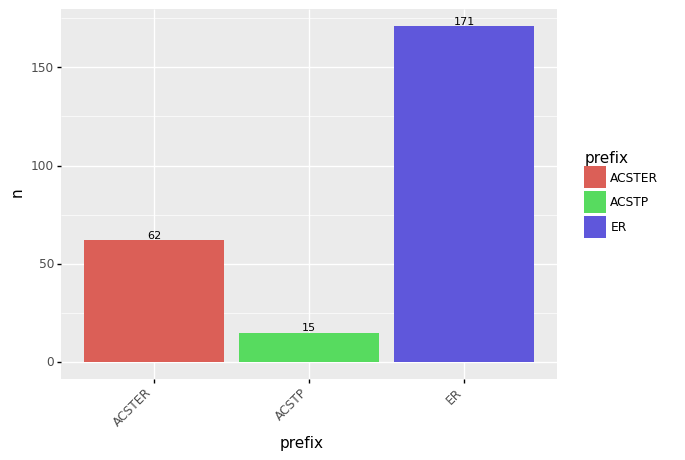

<ggplot: (8775698023933)>

In [67]:
(
    df_hc_prefix_count 
    >> ggplot(aes("prefix", "n", fill="prefix")) 
        + geom_col() 
        + theme(axis_text_x = element_text(angle = 45 , hjust=1))
        + geom_text(aes(label='n'),                                   
             size=8, va='bottom', format_string='{}')
)

In [68]:
df_hc >> filter(_.projectID == "32L0") >> count(_.seq) >> arrange(-_.n)

,seq,n
0,1,71
1,2,71
2,3,50
3,4,36
4,5,11
5,6,7
6,7,2


### Looking at Projects with 5904

In [74]:
df_hc >> filter(_.projectID == "5904")

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,...,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,5904,2018.0,Humboldt County
61,Obligated,BPMP,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,...,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,5904,2018.0,Humboldt County
277,Obligated,BPMP,5904(121),Humboldt County,2018-11-02,2018-11-02,2018-11-02,2018-11-06,2018-11-07,-81905.86,...,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,2,2018-11-02,2018-11-02,NON-MPO,5904,2018.0,Humboldt County
278,Obligated,RPSTPL,5904(143),Humboldt County,2018-07-06,2018-10-01,2018-11-06,2018-11-07,2018-11-07,550000.00,...,BIKEPED-A,Humboldt County Between Bracut And Eureka Ajt ...,Class 1 Multi-use Trail (tc),2,2018-06-21,2018-06-21,NON-MPO,5904,2018.0,Humboldt County
467,Obligated,BPMP,5904(135),Humboldt County,2018-09-28,2018-09-28,2018-09-28,2018-10-10,2018-10-15,-16797.31,...,HBPLOCAL,"China Creek Bridge 04c0019, And Nissen Slough ...",Bridge Preventative Maintenance,2,NaT,NaT,NON-MPO,5904,2018.0,Humboldt County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20022,DISTRICT,ATPL,5904(151),Humboldt County,2021-10-22,NaT,NaT,NaT,NaT,1358000.00,...,nan,On Sr255 From The Dean Avenue/pacific Avenue I...,Class 1 Multi-use Trail (tc),5,NaT,NaT,NON-MPO,5904,2021.0,Humboldt County
20023,DISTRICT,BPMP,5904(156),Humboldt County,2021-08-05,NaT,NaT,NaT,NaT,629249.10,...,nan,Various Locations In Humboldt County,Bridge Preventive Maintenance: Minor Concrete ...,3,NaT,NaT,NON-MPO,5904,2021.0,Humboldt County
20024,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,...,nan,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,5904,2021.0,Humboldt County
20025,DISTRICT,HSIPL,5904(181),Humboldt County,2021-10-20,NaT,NaT,NaT,NaT,154662.00,...,nan,Intersection Of Redwood Drive And Redway Drive...,Install Enhanced Pedestrian Crossing With Bulb...,3,NaT,NaT,NON-MPO,5904,2021.0,Humboldt County


In [75]:
df_hc >> filter(_.projectID == "5904", _.type_of_work.str.contains("Bridge"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,ftip_no,project_location,type_of_work,seq,date_request_initiated,date_completed_request,mpo,projectID,prepared_y,primary_agency_name
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,...,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,5904,2018.0,Humboldt County
61,Obligated,BPMP,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,21619.00,...,HBPLOCAL,On Lindley Road At Mattole River (bridge 04c0075),Bridge Preventive Maintenance: Replace Wood Wh...,2,2018-11-13,2018-12-06,NON-MPO,5904,2018.0,Humboldt County
277,Obligated,BPMP,5904(121),Humboldt County,2018-11-02,2018-11-02,2018-11-02,2018-11-06,2018-11-07,-81905.86,...,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,2,2018-11-02,2018-11-02,NON-MPO,5904,2018.0,Humboldt County
467,Obligated,BPMP,5904(135),Humboldt County,2018-09-28,2018-09-28,2018-09-28,2018-10-10,2018-10-15,-16797.31,...,HBPLOCAL,"China Creek Bridge 04c0019, And Nissen Slough ...",Bridge Preventative Maintenance,2,NaT,NaT,NON-MPO,5904,2018.0,Humboldt County
468,Obligated,BPMP,5904(139),Humboldt County,2018-08-31,2018-10-01,2018-10-10,2018-10-12,2018-10-15,-123758.02,...,HBPLOCAL,Holmes Flat Road Over Larabee Low Level-eel River,Bridge Preventative Maintenance,3,2018-08-29,2018-08-29,NON-MPO,5904,2018.0,Humboldt County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19251,Obligated,BRLS,5904(127),Humboldt County,2021-04-29,2021-05-19,2021-05-28,2021-06-01,2021-06-15,-48480.20,...,HBPLOCAL,Williams Creek Bridge On Grizzly Bluff Road,Bridge Replacement,8,2020-08-28,2021-05-18,NON-MPO,5904,2021.0,Humboldt County
20021,DISTRICT,BPMP,5904(141),Humboldt County,2021-08-11,NaT,NaT,NaT,NaT,53348.54,...,nan,In Humboldt County On Mccann Road Over The Eel...,Bridge Preventive Maintenance,5,NaT,NaT,NON-MPO,5904,2021.0,Humboldt County
20023,DISTRICT,BPMP,5904(156),Humboldt County,2021-08-05,NaT,NaT,NaT,NaT,629249.10,...,nan,Various Locations In Humboldt County,Bridge Preventive Maintenance: Minor Concrete ...,3,NaT,NaT,NON-MPO,5904,2021.0,Humboldt County
20024,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,...,nan,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,5904,2021.0,Humboldt County


In [76]:
## 88 rows of all bridge related funding obligations- appears from this small subset that HBPLOCAL is the FTIP Code, 
### yet, we have various Prefix Codes.

In [77]:
(df_hc 
    >> filter(_.projectID == "5904", _.type_of_work.str.contains("Bridge"))
    >> count(_.project_no) >> arrange(-_.n)
)

,project_no,n
11,5904(126),7
12,5904(127),7
4,5904(113),6
5,5904(118),5
9,5904(122),5
18,5904(141),5
2,5904(092),4
8,5904(121),4
16,5904(139),4
3,5904(112),3


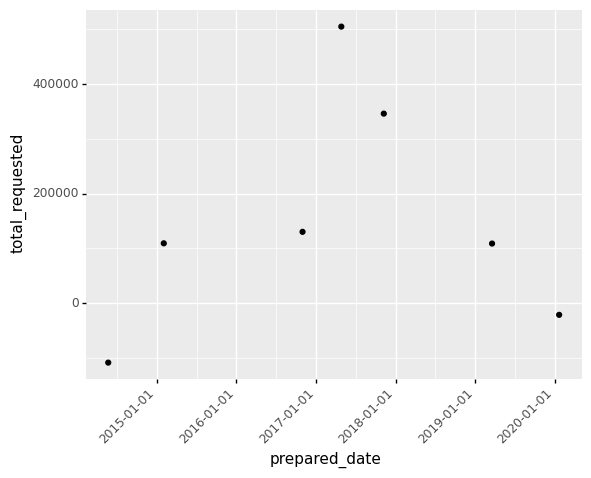

<ggplot: (8775698053663)>

In [78]:
## mplotting to see the timeline of one project 5904(126)
(df_hc 
    >> filter(_.project_no == "5904(126)")
    >> ggplot(aes("prepared_date", "total_requested")) + geom_point() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
)